In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor


##### a.	Generate the simulated data first using following equation. Sample 120k data as X from uniform distribution [-2*Pi, 2*Pi], then feed the sampled X into the equation to get Y. Randomly select 60K as training and 60 K as testing.

In [40]:
# Set random seed for reproducibility
np.random.seed(42)

#Sample 120k data as X uniform distribution [-2*Pi, 2*Pi]
X = np.random.uniform(-2 * np.pi, 2 * np.pi, 120000) 

In [41]:
# Define the equation to generate Y
def f(x):
    return 2 * (2 * np.cos(x)**2 - 1)**2 - 1

Y = f(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
X_train_reshaped = X_train.reshape(-1, 1)
X_test_reshaped = X_test.reshape(-1, 1)

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
C:\Users\IngMa\AppData\Local\Temp\ipykernel_2584\4189559045.py:4: SyntaxWarning: invalid escape sequence '\c'
  plt.title("Simulated Data: $Y = 2(2\cos^2(x)-1)^2 - 1$")


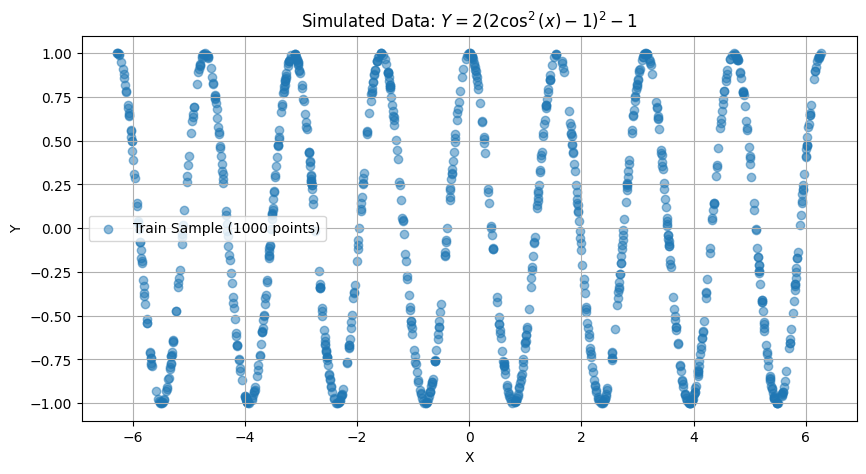

In [53]:

# Plot the generated data to visualize
plt.figure(figsize=(10, 5))
plt.scatter(X_train[:1000], Y_train[:1000], alpha=0.5, label='Train Sample (1000 points)')
plt.title("Simulated Data: $Y = 2(2\cos^2(x)-1)^2 - 1$")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

##### b.	Train 3 versions of Neural Network, with different numbers of hidden layer (NN with 1 hidden layer, 2 hidden layers and 3 hidden layers), using Mean squared error as objective function and error measurement.

In [65]:
# Function to calculate total parameters in the model
def calculate_parameters(units, layers):
    total_params = (1 * units) + units # Input to first hidden layer
    total_params += (layers - 1) * (units * units + units) # Hidden to hidden layers
    total_params += units * 1 + 1 # Last hidden to output
    return total_params

# Settings
units_list = [16, 32, 64, 128]
layers_list = [1, 2, 3]

# Results containers
mse_results = {1: [], 2: [], 3: []}
param_counts = {1: [], 2: [], 3: []}

# Updated model builder to return param count too
def build_and_train_model(units, layers):
    model = Sequential()
    model.add(Dense(units, input_dim=1, activation='relu'))
    for _ in range(layers - 1):
        model.add(Dense(units, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train_reshaped, Y_train, epochs=10, verbose=0, batch_size=128)
    Y_pred = model.predict(X_test_reshaped).flatten()
    mse = mean_squared_error(Y_test, Y_pred)
    param_count = calculate_parameters(units, layers)
    return Y_pred, mse, param_count

# Run models and collect data
for layers in layers_list:
    for units in units_list:
        _, mse, params = build_and_train_model(units, layers)
        mse_results[layers].append(mse)
        param_counts[layers].append(params)


c:\Users\IngMa\.conda\envs\predict\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 544us/step


c:\Users\IngMa\.conda\envs\predict\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 578us/step


c:\Users\IngMa\.conda\envs\predict\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 510us/step


c:\Users\IngMa\.conda\envs\predict\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step


c:\Users\IngMa\.conda\envs\predict\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 565us/step


c:\Users\IngMa\.conda\envs\predict\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 591us/step


c:\Users\IngMa\.conda\envs\predict\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 579us/step


c:\Users\IngMa\.conda\envs\predict\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 591us/step


c:\Users\IngMa\.conda\envs\predict\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step


c:\Users\IngMa\.conda\envs\predict\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 605us/step


c:\Users\IngMa\.conda\envs\predict\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 564us/step


c:\Users\IngMa\.conda\envs\predict\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 583us/step


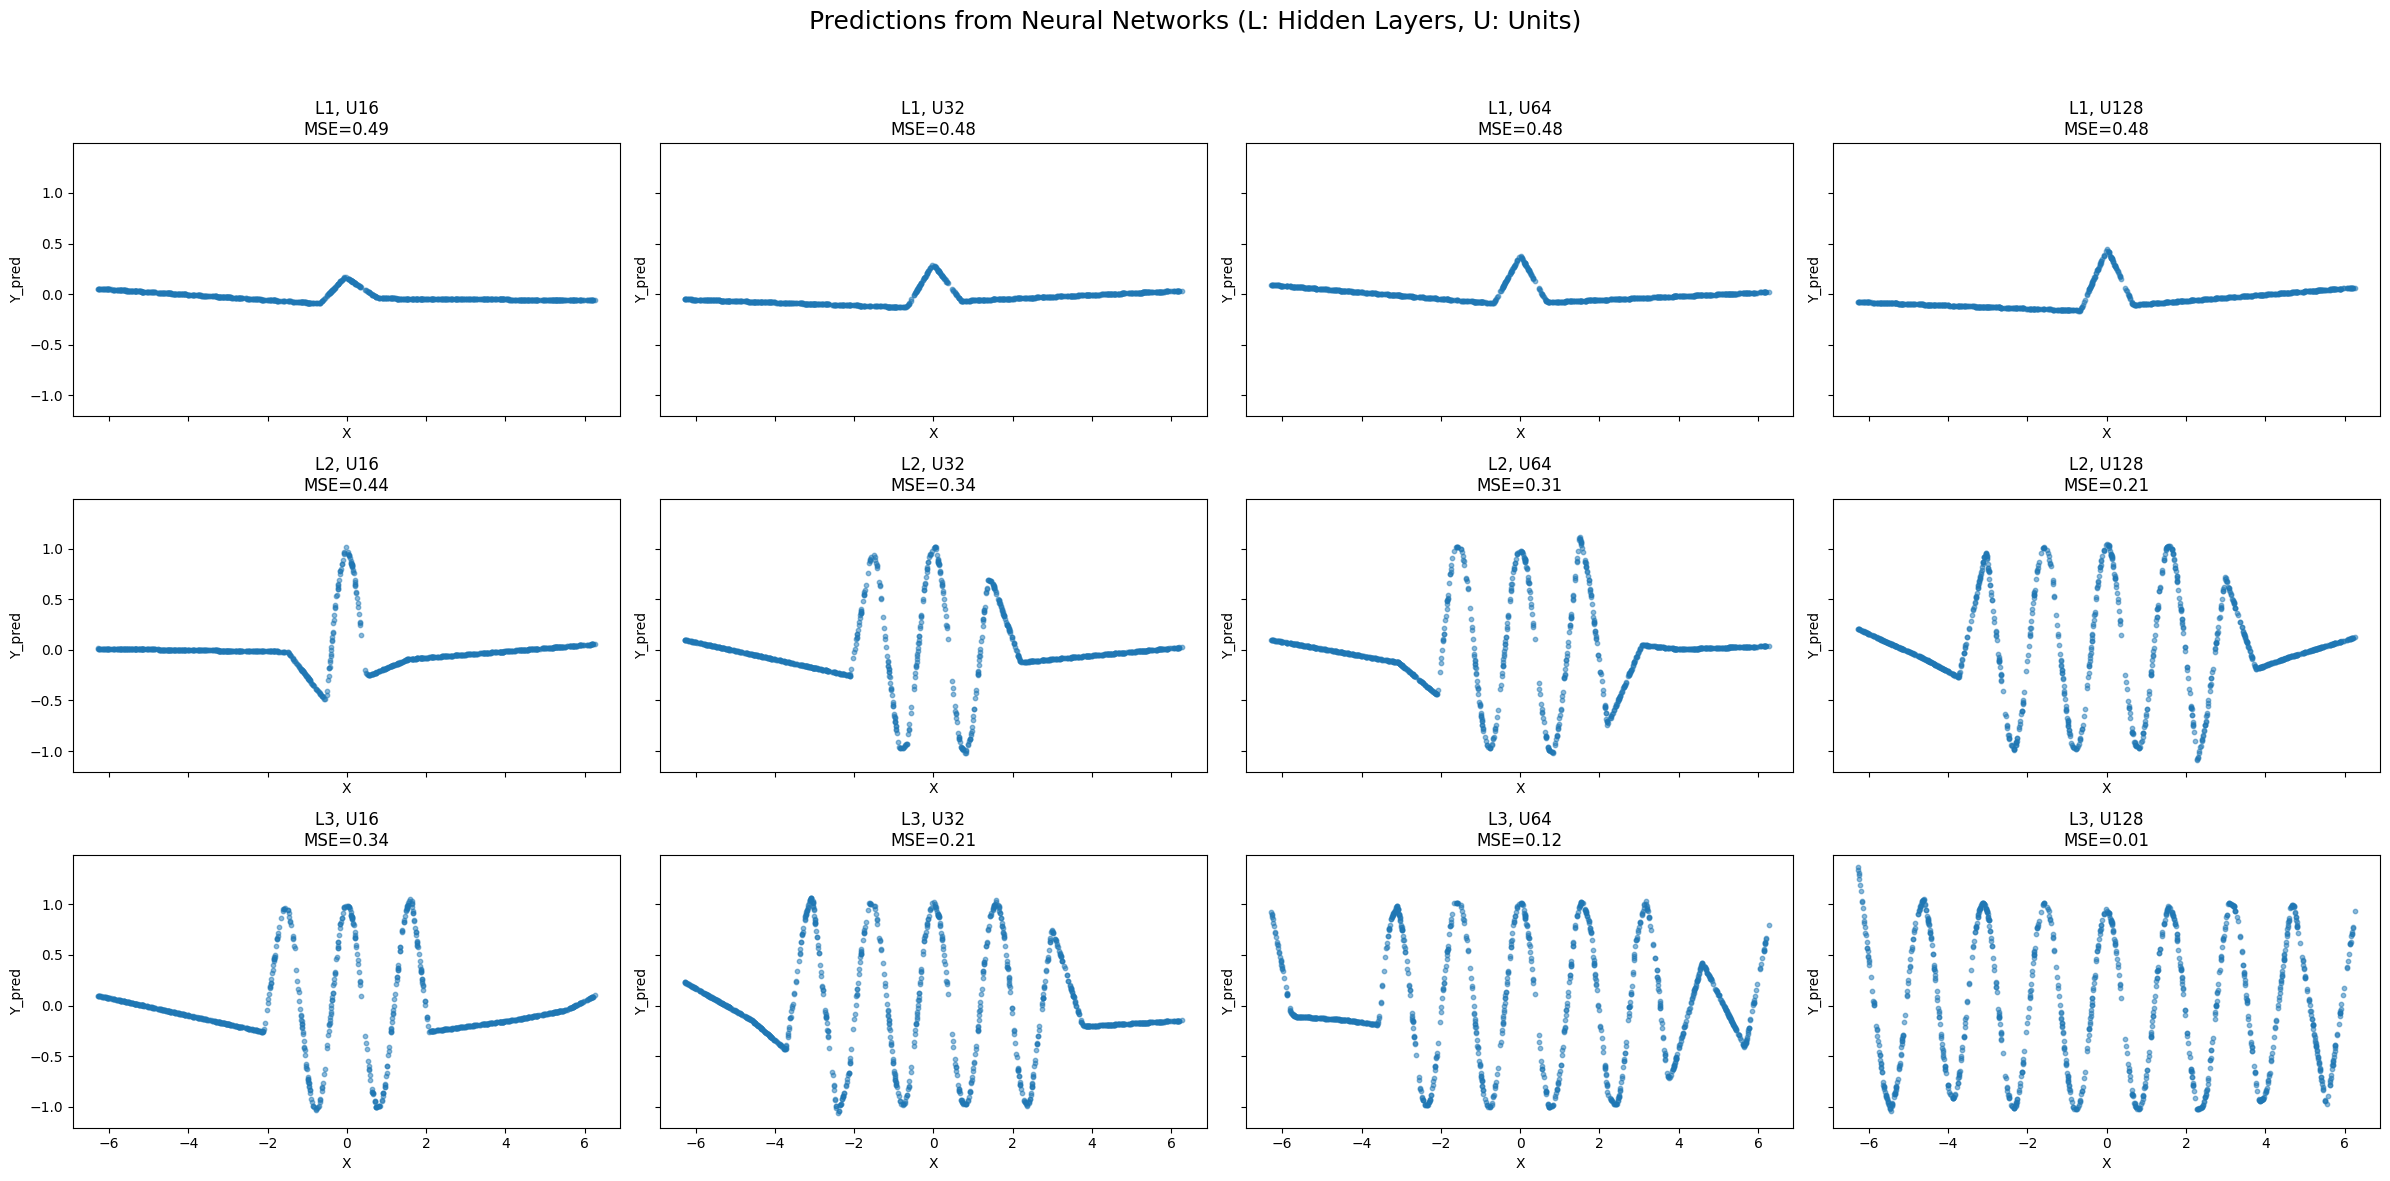

In [66]:
# Prepare the subplot matrix: 3 rows (layers) x 4 columns (units)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(24, 12), sharex=True, sharey=True)
fig.suptitle('Predictions from Neural Networks (L: Hidden Layers, U: Units)', fontsize=18)

# Loop through combinations and plot
for row_idx, layers in enumerate(layers_list):
    for col_idx, units in enumerate(units_list):
        Y_pred, mse, _ = build_and_train_model(units, layers)  
        ax = axes[row_idx, col_idx]
        ax.scatter(X_test_reshaped[:1000], Y_pred[:1000], alpha=0.5, s=10)
        ax.set_title(f"L{layers}, U{units}\nMSE={mse:.2f}")
        ax.set_xlabel("X")
        ax.set_ylabel("Y_pred")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

##### c.	For each version, try different number of neurals in your NN and replicate the following left plot. (You don’t need to replicate exactly same results below but need to show the performance difference of 3 versions of Neural Networks)

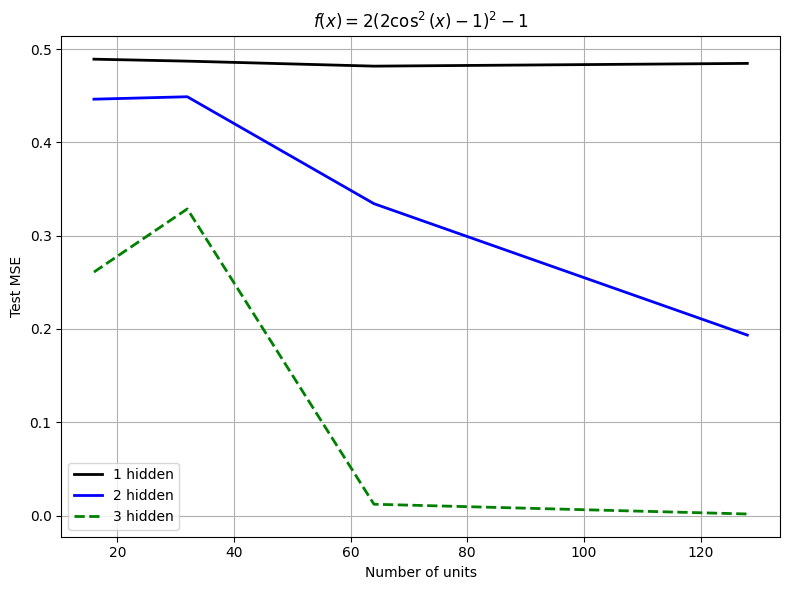

In [68]:
# --- Plot 1: MSE vs Number of Units ---
plt.figure(figsize=(8, 6))
plt.plot(units_list, mse_results[1], label='1 hidden', color='black', linewidth=2)
plt.plot(units_list, mse_results[2], label='2 hidden', color='blue', linewidth=2)
plt.plot(units_list, mse_results[3], label='3 hidden', color='green', linewidth=2, linestyle='--')

plt.xlabel("Number of units")
plt.ylabel("Test MSE")
plt.title(r"$f(x) = 2(2\cos^2(x)-1)^2 - 1$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

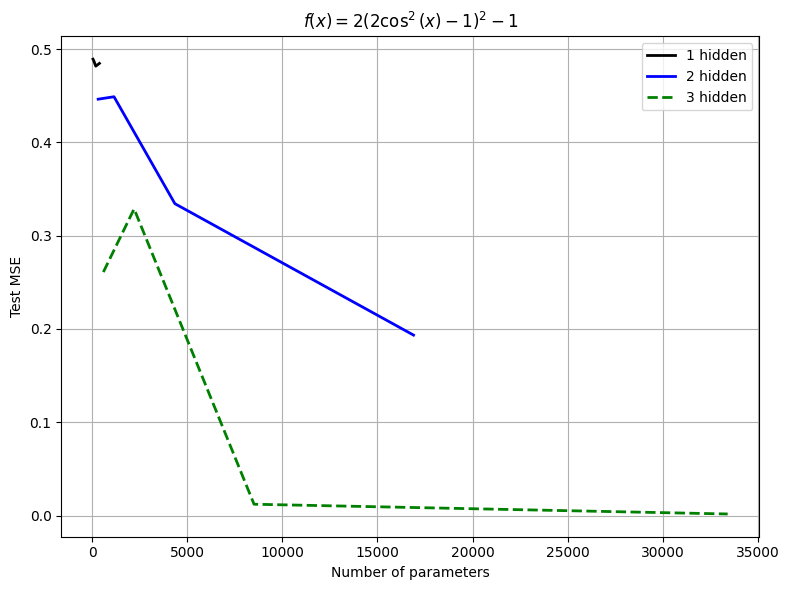

In [69]:
# --- Plot 2: MSE vs Number of Parameters ---
plt.figure(figsize=(8, 6))
plt.plot(param_counts[1], mse_results[1], label='1 hidden', color='black', linewidth=2)
plt.plot(param_counts[2], mse_results[2], label='2 hidden', color='blue', linewidth=2)
plt.plot(param_counts[3], mse_results[3], label='3 hidden', color='green', linewidth=2, linestyle='--')

plt.xlabel("Number of parameters")
plt.ylabel("Test MSE")
plt.title(r"$f(x) = 2(2\cos^2(x)-1)^2 - 1$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()